# 0 Installing required packages

In [2]:
%pip install pandas
%pip install pyarrow
%pip install numpy
%pip install scikit-learn
%pip install imbalanced-learn
%pip install matplotlib
%pip install seaborn
%pip install lightgbm
%pip install catboost


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


#  1 Preparing data

Before a model can even be trained; it requires data. But there are steps needed to ensure that the data is cleaned and ready for a model - if the data is wrongly formatted or missing; the model training process will not work. Thus, the following steps are advised.

## 1.1 Reading Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# df = pd.read_parquet('catB_train.parquet')
filepath = "./data/catB_train.parquet" 
df = pd.read_parquet(filepath)
df_copy = df.copy()

## 1.2 Processing Data

In [4]:
dropped_cols = ['clntnum']
dropped_cols_2 = []
is_not_nan_col = []
cat_columns = ['clttype', 'stat_flag', 'race_desc']

In [5]:
#Drop columns with a single unique value (including nan)
for col in df.columns:
    if df[col].nunique(dropna = False) == 1:
        dropped_cols.append(col)
        df.drop(columns = [col], inplace = True)

In [6]:
for col in df.columns:
    if df[col].nunique(dropna = False) == 1:
        dropped_cols.append(col)
        df.drop(columns = [col], inplace = True)
    if df[col].nunique(dropna = False) == 2 and df[col].nunique(dropna = True) == 1:
        print(col, df[col].unique())
        is_not_nan_col.append(col)

is_dependent_in_at_least_1_policy [ 0. nan]
f_ever_declined_la [nan  1.]
lapse_ape_ltc_1280bf [Decimal('0.00') None]
lapse_ape_inv_dcd836 [Decimal('0.00') None]
lapse_ape_lh_d0adeb [Decimal('0.00') None]
lapse_ape_32c74c [Decimal('0.00') None]
n_months_since_lapse_ltc_1280bf ['9999' None]
n_months_since_lapse_inv_dcd836 ['9999' None]
n_months_since_lapse_lh_d0adeb ['9999' None]
n_months_since_lapse_32c74c ['9999' None]
flg_affconnect_show_interest_ever [nan  1.]
flg_affconnect_ready_to_buy_ever [nan  1.]
flg_hlthclaim_839f8a_ever [nan  1.]
flg_hlthclaim_14cb37_ever [nan  1.]
f_purchase_lh [nan  1.]


In [7]:
for col in is_not_nan_col:
    df[col] = (~df[col].isnull()).astype(int)

In [8]:
df.info(verbose= True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 17992 entries, 19550 to 15795
Data columns (total 247 columns):
 #    Column                             Non-Null Count  Dtype  
---   ------                             --------------  -----  
 0    clntnum                            17992 non-null  object 
 1    race_desc                          13996 non-null  object 
 2    ctrycode_desc                      17972 non-null  object 
 3    clttype                            17992 non-null  object 
 4    stat_flag                          17992 non-null  object 
 5    min_occ_date                       17992 non-null  object 
 6    cltdob_fix                         17992 non-null  object 
 7    cltsex_fix                         17969 non-null  object 
 8    flg_substandard                    16978 non-null  float64
 9    flg_is_borderline_standard         16978 non-null  float64
 10   flg_is_revised_term                16978 non-null  float64
 11   flg_is_rental_flat                 16978

In [9]:
df.groupby("ctrycode_desc", dropna = False)['f_purchase_lh'].describe() # non singaporean => y = 0

,count,mean,std,min,25%,50%,75%,max
ctrycode_desc,,,,,,,,
Australia,10.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Bosnia-Herzegovina,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
Brunei Darussalam,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
Canada,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
China,4.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Denmark,2.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Hong Kong,2.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Indonesia,18.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Ireland,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0


In [10]:
df['cltsex_fix'].value_counts()

cltsex_fix
Male      9773
Female    8196
Name: count, dtype: int64

In [11]:
for col in ['min_occ_date', 'cltdob_fix']:
    print(col)
    print(df[col].value_counts(dropna = False))
    print((df[col] == 'None').sum())

min_occ_date
min_occ_date
2023-01-01    1168
2016-12-01     180
2022-08-01     178
2016-10-01     159
2023-04-01     143
              ... 
1988-05-20       1
2011-03-05       1
2014-11-20       1
2021-04-18       1
1990-03-20       1
Name: count, Length: 4576, dtype: int64
10
cltdob_fix
cltdob_fix
None          22
1992-09-30     8
1985-11-28     8
1993-02-16     7
1985-01-16     7
              ..
1989-06-30     1
1957-06-12     1
1994-05-15     1
1943-02-08     1
1970-05-15     1
Name: count, Length: 11076, dtype: int64
22


In [12]:
for col in ['hh_20', 'pop_20', 'hh_size', 'hh_size_est', 'annual_income_est']:
    print(col, df[col].dtype, df[col].value_counts(dropna = False)) # Exactly 2809 none values in each. We can club them. Also, some of them are objects. We can convert them to float.

hh_20 object hh_20
None    2809
1       1353
90       207
84       180
82       171
        ... 
269        1
440        1
402        1
305        1
344        1
Name: count, Length: 338, dtype: int64
pop_20 object pop_20
None    2809
3        567
2        294
4        254
1        195
        ... 
784        1
567        1
978        1
1571       1
970        1
Name: count, Length: 870, dtype: int64
hh_size float64 hh_size
NaN         2809
3.000000     676
1.000000     502
2.000000     341
4.000000     287
            ... 
2.897059       1
3.101562       1
2.973856       1
3.098361       1
3.211765       1
Name: count, Length: 4935, dtype: int64
hh_size_est object hh_size_est
3       6096
4       3222
None    2809
>4      2675
2       2276
1        837
0         77
Name: count, dtype: int64
annual_income_est object annual_income_est
E.BELOW30K     7771
None           2809
C.60K-100K     2679
A.ABOVE200K    2097
D.30K-60K      1911
B.100K-200K     725
Name: count, dtype: int64


In [13]:
for col in ['recency_lapse', 'recency_cancel']:
    print(col, df[col].dtype, df[col].value_counts(dropna = False))
    print(df[col].corr(df['f_purchase_lh'])) # high -ve correlation.
    print(df[df[col].isna()]['f_purchase_lh'].mean()) # similar behaviour as high value. it makes sense too as no recency lapse => infinite recency laps so giving it the max value

recency_lapse float64 recency_lapse
NaN      12592
56.0       118
50.0       115
3.0        108
4.0         94
         ...  
197.0        1
327.0        1
486.0        1
379.0        1
290.0        1
Name: count, Length: 305, dtype: int64
-0.1627039265394085
0.0241423125794155
recency_cancel float64 recency_cancel
NaN      17368
11.0        41
13.0        16
9.0         16
41.0        15
         ...  
131.0        1
102.0        1
147.0        1
145.0        1
105.0        1
Name: count, Length: 113, dtype: int64
-0.10588849594701963
0.03656149239981575


In [14]:
for col in ['tot_cancel_pols', 'flg_affconnect_show_interest_ever', 'flg_affconnect_ready_to_buy_ever']:
    display(df[col].value_counts(dropna= False))
    display(df.groupby(col, dropna = False)['f_purchase_lh'].describe()) # similar behavior for all non nans => add to is_not_nan_col

tot_cancel_pols
NaN    17368
1.0      526
2.0       72
3.0       18
4.0        6
6.0        2
Name: count, dtype: int64

,count,mean,std,min,25%,50%,75%,max
tot_cancel_pols,,,,,,,,
1.0,526.0,0.117871,0.322762,0.0,0.0,0.0,0.0,1.0
2.0,72.0,0.125000,0.333040,0.0,0.0,0.0,0.0,1.0
3.0,18.0,0.166667,0.383482,0.0,0.0,0.0,0.0,1.0
4.0,6.0,0.166667,0.408248,0.0,0.0,0.0,0.0,1.0
6.0,2.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
NaN,17368.0,0.036561,0.187688,0.0,0.0,0.0,0.0,1.0


flg_affconnect_show_interest_ever
0    17497
1      495
Name: count, dtype: int64

,count,mean,std,min,25%,50%,75%,max
flg_affconnect_show_interest_ever,,,,,,,,
0,17497.0,0.037321,0.189552,0.0,0.0,0.0,0.0,1.0
1,495.0,0.115152,0.319528,0.0,0.0,0.0,0.0,1.0


flg_affconnect_ready_to_buy_ever
0    17178
1      814
Name: count, dtype: int64

,count,mean,std,min,25%,50%,75%,max
flg_affconnect_ready_to_buy_ever,,,,,,,,
0,17178.0,0.036034,0.186381,0.0,0.0,0.0,0.0,1.0
1,814.0,0.111794,0.315306,0.0,0.0,0.0,0.0,1.0


In [15]:
is_not_nan_col.extend(['tot_cancel_pols', 'flg_affconnect_show_interest_ever', 'flg_affconnect_ready_to_buy_ever'])

In [16]:
df['flg_affconnect_lapse_ever'].value_counts(dropna = False)

flg_affconnect_lapse_ever
NaN    17178
0.0      805
1.0        9
Name: count, dtype: int64

In [17]:
display(df.groupby('flg_affconnect_lapse_ever', dropna = False)['f_purchase_lh'].describe()) # similar behavior for all non nans => add to is_not_nan_col
is_not_nan_col.append('flg_affconnect_lapse_ever')

,count,mean,std,min,25%,50%,75%,max
flg_affconnect_lapse_ever,,,,,,,,
0.0,805.0,0.111801,0.315318,0.0,0.0,0.0,0.0,1.0
1.0,9.0,0.111111,0.333333,0.0,0.0,0.0,0.0,1.0
NaN,17178.0,0.036034,0.186381,0.0,0.0,0.0,0.0,1.0


In [18]:
for col in df.columns:
    if col[:3] == "ape" or col[:6] == "sumins" or col[:8] == "prempaid":
        print(col, df[col].dtype) # the types are given as objects but they are actually ints

ape_grp_6fc3e6 object
ape_grp_de05ae object
ape_grp_945b5a object
ape_grp_6a5788 object
ape_ltc_43b9d5 object
ape_grp_9cdedf object
ape_grp_1581d7 object
ape_grp_22decf object
ape_lh_507c37 object
ape_lh_839f8a object
ape_inv_e9f316 object
ape_grp_caa6ff object
ape_grp_fd3bfb object
ape_lh_e22a6a object
ape_grp_70e1dd object
ape_grp_e04c3a object
ape_grp_fe5fb8 object
ape_grp_94baec object
ape_grp_e91421 object
ape_lh_f852af object
ape_lh_947b15 object
sumins_grp_6fc3e6 object
sumins_grp_de05ae object
sumins_grp_945b5a object
sumins_grp_6a5788 object
sumins_ltc_43b9d5 object
sumins_grp_9cdedf object
sumins_grp_1581d7 object
sumins_lh_507c37 object
sumins_inv_e9f316 object
sumins_grp_caa6ff object
sumins_grp_fd3bfb object
sumins_grp_70e1dd object
sumins_grp_fe5fb8 object
sumins_grp_e91421 object
sumins_lh_f852af object
sumins_lh_947b15 object
prempaid_grp_6fc3e6 object
prempaid_grp_de05ae object
prempaid_grp_945b5a object
prempaid_grp_6a5788 object
prempaid_ltc_43b9d5 object
prempaid_gr

In [19]:
for col in ['flg_substandard', 'flg_is_borderline_standard', 'flg_is_revised_term',
       'flg_is_rental_flat', 'flg_has_health_claim', 'flg_has_life_claim',
       'flg_gi_claim', 'flg_is_proposal', 'flg_with_preauthorisation',
       'flg_is_returned_mail', 'is_consent_to_mail', 'is_consent_to_email',
       'is_consent_to_call', 'is_consent_to_sms', 'is_valid_dm',
       'is_valid_email', 'is_housewife_retiree', 'is_sg_pr', 'is_class_1_2',
       'is_dependent_in_at_least_1_policy']:
    print(col, df[col].isna().sum())

flg_substandard 1014
flg_is_borderline_standard 1014
flg_is_revised_term 1014
flg_is_rental_flat 1014
flg_has_health_claim 1014
flg_has_life_claim 1014
flg_gi_claim 1014
flg_is_proposal 1014
flg_with_preauthorisation 1014
flg_is_returned_mail 1014
is_consent_to_mail 1014
is_consent_to_email 1014
is_consent_to_call 1014
is_consent_to_sms 1014
is_valid_dm 1014
is_valid_email 1014
is_housewife_retiree 1014
is_sg_pr 1014
is_class_1_2 1014
is_dependent_in_at_least_1_policy 0


In [20]:
dropped_cols.append('is_dependent_in_at_least_1_policy') # 1014 nan values originally which we'll create a separate column for. all other values are the same
is_not_nan_col.remove('is_dependent_in_at_least_1_policy')

In [21]:
for col in df.columns:
    if "n_months_last_bought_" in col or "lapse_ape_" in col or "n_months_since_lapse_" in col:
        print(col, df[col].dtype)

n_months_last_bought_products int64
lapse_ape_ltc_1280bf int64
lapse_ape_grp_6fc3e6 object
lapse_ape_grp_de05ae object
lapse_ape_inv_dcd836 int64
lapse_ape_grp_945b5a object
lapse_ape_grp_6a5788 object
lapse_ape_ltc_43b9d5 object
lapse_ape_grp_9cdedf object
lapse_ape_lh_d0adeb int64
lapse_ape_grp_1581d7 object
lapse_ape_grp_22decf object
lapse_ape_lh_507c37 object
lapse_ape_lh_839f8a object
lapse_ape_inv_e9f316 object
lapse_ape_grp_caa6ff object
lapse_ape_grp_fd3bfb object
lapse_ape_lh_e22a6a object
lapse_ape_grp_70e1dd object
lapse_ape_grp_e04c3a object
lapse_ape_grp_fe5fb8 object
lapse_ape_grp_94baec object
lapse_ape_grp_e91421 object
lapse_ape_lh_f852af object
lapse_ape_lh_947b15 object
lapse_ape_32c74c int64
n_months_since_lapse_ltc_1280bf int64
n_months_since_lapse_grp_6fc3e6 object
n_months_since_lapse_grp_de05ae object
n_months_since_lapse_inv_dcd836 int64
n_months_since_lapse_grp_945b5a object
n_months_since_lapse_grp_6a5788 object
n_months_since_lapse_ltc_43b9d5 object
n_month

In [22]:
df['annual_income_est'].value_counts(dropna = False)

annual_income_est
E.BELOW30K     7771
None           2809
C.60K-100K     2679
A.ABOVE200K    2097
D.30K-60K      1911
B.100K-200K     725
Name: count, dtype: int64

In [23]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler

def clean(df):
    df.drop(columns=dropped_cols, inplace=True)
    for col in is_not_nan_col:
        df[col] = (~df[col].isnull()).astype(int)
    df["ctrycode_desc"] = (df["ctrycode_desc"] == "Singapore").astype(int) # non singaporean => target 0
    df['cltsex_fix'] = (df['cltsex_fix'] == "Female").astype(int)
    df['min_occ_date'] = 2024-pd.to_datetime(df['min_occ_date'].replace({"None": np.nan})).dt.year # 10 nan values
    df['cltdob_fix'] = 2024-pd.to_datetime(df['cltdob_fix'].replace({"None": np.nan})).dt.year # 22 nan values
    df['hh_20'] = df['hh_20'].astype(float)
    df['pop_20'] = df['pop_20'].astype(float)
    df['hh_size_est'].replace('>4', '5', inplace=True)
    df['hh_size_est'] = df['hh_size_est'].astype(float)
    df['recency_lapse'] = df['recency_lapse'].fillna(df['recency_lapse'].max()) # None => no recency lapse => infinite recency laps so giving it the max value
    df['recency_cancel'] = df['recency_cancel'].fillna(df['recency_cancel'].max())
    df['annual_income_est'] = df['annual_income_est'].map({'A.ABOVE200K': 5, 'B.100K-200K': 4, 'C.60K-100K': 3, 'D.30K-60K': 2, 'E.BELOW30K': 1, 'None': np.nan}).astype(float)

    for col in df.columns:
        if col[:3] == "ape" or col[:6] == "sumins" or col[:8] == "prempaid" or "n_months_last_bought_" in col or "lapse_ape_" in col or "n_months_since_lapse_" in col:
            df[col] = df[col].astype(float)

    df['hlthclaim_amt'] = df['hlthclaim_amt'].astype(float)
    df['giclaim_amt'] = df['giclaim_amt'].astype(float)

    df = df.copy()

    # groups with common nan values
    nan_groups = [['affcon_visit_days', 'n_months_since_visit_affcon'],
                      ['clmcon_visit_days', 'recency_clmcon', 'recency_clmcon_regis'],
                      ['hlthclaim_amt', 'recency_hlthclaim'],
                      ['hlthclaim_cnt_success', 'recency_hlthclaim_success'],
                      ['hlthclaim_cnt_unsuccess', 'recency_hlthclaim_unsuccess'],
                      ['giclaim_amt', 'recency_giclaim'],
                      ['flg_substandard', 'flg_is_borderline_standard', 'flg_is_revised_term',
       'flg_is_rental_flat', 'flg_has_health_claim', 'flg_has_life_claim',
       'flg_gi_claim', 'flg_is_proposal', 'flg_with_preauthorisation',
       'flg_is_returned_mail', 'is_consent_to_mail', 'is_consent_to_email',
       'is_consent_to_call', 'is_consent_to_sms', 'is_valid_dm',
       'is_valid_email', 'is_housewife_retiree', 'is_sg_pr', 'is_class_1_2'],
       ['hh_20', 'pop_20', 'hh_size', 'hh_size_est'],
       ['lapse_ape_lh_d0adeb', 'n_months_since_lapse_grp_6fc3e6', 'n_months_since_lapse_inv_dcd836', 'n_months_since_lapse_grp_945b5a', 'n_months_since_lapse_grp_6a5788', 'n_months_since_lapse_ltc_43b9d5', 'n_months_since_lapse_grp_9cdedf', 'n_months_since_lapse_lh_d0adeb', 'n_months_since_lapse_grp_1581d7', 'n_months_since_lapse_grp_22decf', 'n_months_since_lapse_lh_507c37', 'n_months_since_lapse_lh_839f8a', 'n_months_since_lapse_inv_e9f316', 'n_months_since_lapse_grp_caa6ff', 'n_months_since_lapse_grp_fd3bfb', 'n_months_since_lapse_lh_e22a6a', 'n_months_since_lapse_grp_70e1dd', 'n_months_since_lapse_grp_e04c3a', 'n_months_since_lapse_grp_fe5fb8', 'n_months_since_lapse_grp_94baec', 'n_months_since_lapse_grp_e91421', 'n_months_since_lapse_lh_f852af', 'n_months_since_lapse_lh_947b15', 'n_months_since_lapse_grp_de05ae', 'n_months_since_lapse_ltc_1280bf', 'lapse_ape_grp_e04c3a', 'lapse_ape_32c74c', 'lapse_ape_lh_e22a6a', 'lapse_ape_grp_fd3bfb', 'lapse_ape_grp_caa6ff', 'lapse_ape_inv_e9f316', 'lapse_ape_lh_839f8a', 'lapse_ape_lh_507c37', 'lapse_ape_grp_22decf', 'lapse_ape_grp_1581d7', 'lapse_ape_grp_fe5fb8', 'lapse_ape_grp_9cdedf', 'lapse_ape_ltc_43b9d5', 'lapse_ape_grp_6a5788', 'lapse_ape_grp_945b5a', 'lapse_ape_inv_dcd836', 'lapse_ape_grp_de05ae', 'lapse_ape_grp_6fc3e6', 'lapse_ape_ltc_1280bf', 'lapse_ape_grp_94baec', 'lapse_ape_grp_e91421', 'lapse_ape_lh_f852af', 'lapse_ape_lh_947b15', 'n_months_since_lapse_32c74c', 'lapse_ape_grp_70e1dd']]

    # For each group, create a new variable called has_<first_variable>
    for group in nan_groups:
        df["has_"+group[0]] = (df[group[0]].isna() == False).astype(int)

    # for months and recency, fillna with 9999
    for col in df.columns:
        if "n_months" in col or "recency" in col:
            df[col] = df[col].fillna(9999)

    # fill the rest with KNN imputer
    # KNN imputer very slow, we can just use this at the end
    # imputer = SimpleImputer(strategy='median')
    imputer = KNNImputer(n_neighbors=5)
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    categorical_cols = df.select_dtypes(exclude=[np.number]).columns
    numeric_df = df[numeric_cols]
    categorical_df = df[categorical_cols]
    numeric_df_imputed = pd.DataFrame(imputer.fit_transform(numeric_df), columns=numeric_cols)
    numeric_df_imputed.index = categorical_df.index
    df = pd.concat([numeric_df_imputed, categorical_df], axis=1)
    
    # encode categories into integers as supported by lgb
    df[cat_columns] = df[cat_columns].astype('category')
    df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

    df.drop(columns = dropped_cols_2, inplace = True, errors = 'ignore')
    return df

In [24]:
df = clean(df_copy.copy())

dropped_cols_2 = []
# Calculate the correlation matrix
corr_matrix = df.corr()

# Find the most correlated features
# We use stack to convert the matrix to a Series, where each pair of features is indexed
# Then, we sort by absolute values and drop duplicates
most_correlated_pairs = corr_matrix.abs().stack().sort_values(ascending=False).drop_duplicates()

# Display the most correlated features
for i in most_correlated_pairs.index:
    if most_correlated_pairs[i] < 0.99: break
    if i[0] not in dropped_cols and i[1] not in dropped_cols and i[0] not in dropped_cols_2 and i[1] not in dropped_cols_2:
        dropped_cols_2.append(i[1])

df = clean(df_copy.copy())

most_correlated_pairs = corr_matrix.abs().stack().sort_values(ascending=False).drop_duplicates()

for i in most_correlated_pairs.index:
    if 'f_purchase_lh' in i:
        if i[0] == 'f_purchase_lh':
            print(i[1], most_correlated_pairs[i])
        else:
            print(i[0], most_correlated_pairs[i])

n_months_last_bought_gi 0.19692804972404895
f_ever_bought_gi 0.19496610183434834
flg_gi_claim 0.1425127832771671
recency_lapse 0.1398860221011368
lapse_ape_ltc_1280bf 0.12015813264212291
is_valid_email 0.11340931339751069
recency_giclaim 0.11249049275580907
has_giclaim_amt 0.11234646283994511
is_valid_dm 0.11206421102377528
flg_latest_being_lapse 0.09535704601134912
tot_inforce_pols 0.09154090465004504
f_mindef_mha 0.090372023065031
n_months_last_bought_839f8a 0.08548387578342094
recency_cancel 0.08491330325602615
f_hold_839f8a 0.08458832066934895
f_ever_bought_839f8a 0.08317556760535066
n_months_since_visit_affcon 0.08087611150863888
has_affcon_visit_days 0.08087371907428809
n_months_last_bought_grp_caa6ff 0.07950847504864335
n_months_last_bought_products 0.07888116608591866
prempaid_839f8a 0.07880142656809577
ape_839f8a 0.0786553430274517
tot_cancel_pols 0.07859725089205978
f_ever_bought_grp_1581d7 0.07465622023604435
f_ever_bought_grp_caa6ff 0.07346872884164965
is_class_1_2 0.072604

In [25]:
dropped_cols_2.append('hh_size_est') # basically same as hh_size

In [26]:
from scipy.stats import skew

s = [[skew(df[col]), col] for col in df.columns if col != 'f_purchase_lh']

s.sort(reverse=True)
for i in s:
    print(i)

[134.12307801263498, 'sumins_grp_fe5fb8']
[134.1230780126349, 'lapse_ape_grp_de05ae']
[94.7041117444174, 'lapse_ape_inv_e9f316']
[87.1298555931183, 'prempaid_grp_de05ae']
[65.67790427764768, 'sumins_grp_de05ae']
[63.87256559746564, 'lapse_ape_grp_9cdedf']
[63.44827561226726, 'lapse_ape_grp_e91421']
[61.02008328196685, 'ape_lh_947b15']
[60.64818629960565, 'prempaid_inv_e9f316']
[60.64818629960565, 'prempaid_c4bda5']
[59.05227889870819, 'ape_inv_e9f316']
[59.05227889870819, 'ape_c4bda5']
[57.49934829622393, 'ape_507c37']
[55.72513598095039, 'sumins_inv_e9f316']
[55.72513598095039, 'sumins_c4bda5']
[50.66839353580249, 'f_ever_bought_grp_de05ae']
[47.21317925989324, 'lapse_ape_grp_fd3bfb']
[42.90530361848007, 'sumins_lh_507c37']
[42.40056885996432, 'lapse_ape_lh_947b15']
[38.8040520807601, 'lapse_ape_grp_e04c3a']
[38.349263683682544, 'flg_is_revised_term']
[38.30270159606198, 'lapse_ape_lh_839f8a']
[36.69699005935632, 'lapse_ape_grp_6a5788']
[35.76989894268596, 'lapse_ape_lh_f852af']
[33.7

/tmp/ipykernel_428654/3036330955.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  s = [[skew(df[col]), col] for col in df.columns if col != 'f_purchase_lh']


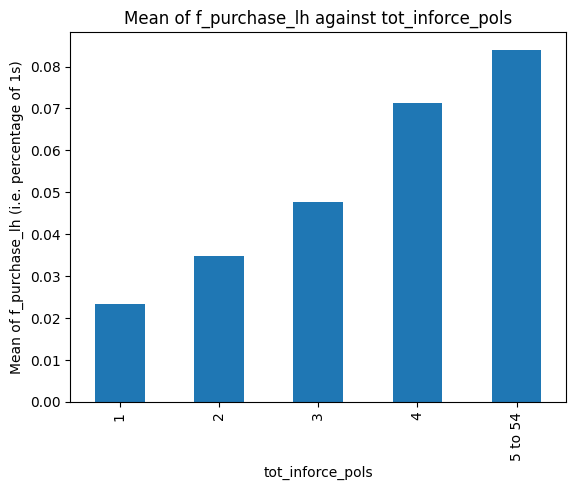

In [27]:
def custom_bin(value):
    if value == 1:
        return '1'
    elif value == 2:
        return '2'
    elif value == 3:
        return '3'
    elif value == 4:
        return '4'
    else:
        return '5 to 54'

# Apply the function to create a new column for the binned data
df['binned'] = df['tot_inforce_pols'].apply(custom_bin)

# Group by the new binned column
grouped = df.groupby('binned')['f_purchase_lh'].mean()

# Plotting
grouped.plot(kind='bar')
plt.xlabel('tot_inforce_pols')
plt.ylabel('Mean of f_purchase_lh (i.e. percentage of 1s)')
plt.title('Mean of f_purchase_lh against tot_inforce_pols')
plt.show()

## 1.3 Applying SMOTE (Synthetic Minority Oversampling Technique)

When dealing with a dataset with unbalanced target variable (for example, many normal emails and few spam emails), we may apply SMOTE to generate more of the minority class, so we can train models to catch positive cases more effectively.

Besides SMOTE, there are many more algorithms and methods one can use to solve the problem. Dive deeper with these articles:
1. https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/
2. https://imbalanced-learn.org/stable/over_sampling.html

In [28]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

df = df_copy.copy()
df_train, df_val = train_test_split(df, test_size = 0.2, random_state = 69)
df_val_copy = df_val.copy()

train_len = len(df_train)

df = clean(pd.concat([df_train, df_val])).copy()
df_train = df.iloc[:train_len, :]
df_val = df.iloc[train_len: , :]

y = df["f_purchase_lh"]
X = df.drop(columns=['f_purchase_lh'])

X_train = df_train.drop(columns=['f_purchase_lh'])
y_train = df_train["f_purchase_lh"]
X_val = df_val.drop(columns=['f_purchase_lh'])
y_val = df_val["f_purchase_lh"]

print('Before:', Counter(y_train))
X_train, y_train = SMOTE().fit_resample(X_train, y_train)
print('After:', Counter(y_train))

Before: Counter({0.0: 13820, 1.0: 573})
After: Counter({1.0: 13820, 0.0: 13820})


# 2. Modelling and Evaluation

After completing the previous stages of the workflow discussed, we are finally ready totrain models and evaluate their performance. In this section, we explore some metrics to evaluate performance, to help us decide if we have a satisfactory model or not. This is usually evaluated against a hold-out set of data.

## 2.1 Metrics

In machine learning, there are many metrics we can use to evaluate model performance. We decide the metric to use depending on the nature of the problem (classification vs regression).

For classification context, here are some metrics we can use:
1. Accuracy
2. Precision
3. Recall
4. F-score, or F1-score (Calculated from Precision and Recall)

Dive deeper:
1. https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
2. https://www.statology.org/sklearn-classification-report/

## 2.2 Cross-validation (the 80-20 train-test split)

Cross validation is used to evaluate your model's performance, giving insight on the cases where your model performs well and where it falls short.

In [29]:
import lightgbm as lgb

train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=cat_columns)
validation_data = lgb.Dataset(X_val, label=y_val, categorical_feature=cat_columns)

param = {'objective': 'binary'}
param['metric'] = 'auc'
num_round = 1000
param['early_stopping_rounds'] = 100
bst = lgb.train(param, train_data, num_round, valid_sets=[validation_data])

[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Info] Number of positive: 13820, number of negative: 13820
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016813 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 42828
[LightGBM] [Info] Number of data points in the train set: 27640, number of used features: 211
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[29]	valid_0's auc: 0.864054


In [30]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(
    iterations=1000,
    eval_metric='AUC',
    use_best_model=True,
    early_stopping_rounds=100
)
cat_model.fit(X_train, y_train, cat_features=cat_columns, eval_set=(X_val, y_val))

Learning rate set to 0.07194
0:	test: 0.7759839	best: 0.7759839 (0)	total: 95.9ms	remaining: 1m 35s
1:	test: 0.8300284	best: 0.8300284 (1)	total: 139ms	remaining: 1m 9s
2:	test: 0.8329338	best: 0.8329338 (2)	total: 175ms	remaining: 58.2s
3:	test: 0.8374226	best: 0.8374226 (3)	total: 212ms	remaining: 52.7s
4:	test: 0.8388826	best: 0.8388826 (4)	total: 252ms	remaining: 50.2s
5:	test: 0.8336696	best: 0.8388826 (4)	total: 293ms	remaining: 48.5s
6:	test: 0.8289257	best: 0.8388826 (4)	total: 330ms	remaining: 46.8s
7:	test: 0.8284028	best: 0.8388826 (4)	total: 365ms	remaining: 45.2s
8:	test: 0.8313388	best: 0.8388826 (4)	total: 400ms	remaining: 44.1s
9:	test: 0.8290512	best: 0.8388826 (4)	total: 443ms	remaining: 43.8s
10:	test: 0.8286906	best: 0.8388826 (4)	total: 479ms	remaining: 43.1s
11:	test: 0.8269744	best: 0.8388826 (4)	total: 534ms	remaining: 44s
12:	test: 0.8269206	best: 0.8388826 (4)	total: 571ms	remaining: 43.3s
13:	test: 0.8280539	best: 0.8388826 (4)	total: 608ms	remaining: 42.8s
1

/home/t1dus/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/t1dus/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/t1dus/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/t1dus/.local/lib/python3.8/site-packa

0.282 0.67 0.3 0.67
1.02 0.67
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97      3462
         1.0       0.29      0.50      0.37       137

    accuracy                           0.93      3599
   macro avg       0.64      0.72      0.67      3599
weighted avg       0.95      0.93      0.94      3599



/home/t1dus/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/t1dus/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/t1dus/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/t1dus/.local/lib/python3.8/site-packa

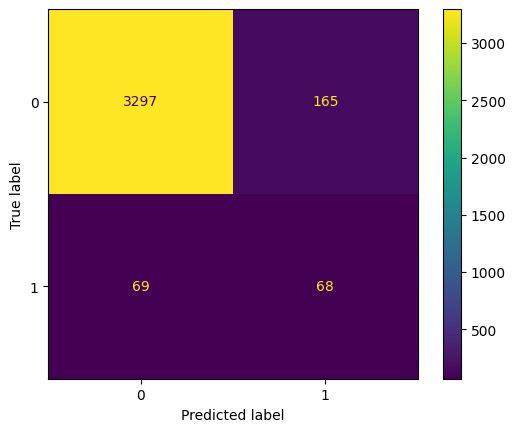

In [31]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc

y_val_pred_lgb = bst.predict(X_val, num_iteration=bst.best_iteration)
y_val_pred_cat = cat_model.predict_proba(X_val)[:, 1]

cat_thres_best = 0
res_cat = 0

for cat_thres_i in range(500):
    cat_thres = cat_thres_i/1e3
    y_val_pred = (y_val_pred_cat > cat_thres).astype(int)
    cur = float(classification_report(y_val, y_val_pred).split()[-8])
    if cur > res_cat:
        res_cat = cur
        cat_thres_best = cat_thres

lgb_thres_best = 0
res_lgb = 0
for lgb_thres_i in range(500):
    lgb_thres = lgb_thres_i/1e3
    y_val_pred = (y_val_pred_lgb > lgb_thres).astype(int)
    cur = float(classification_report(y_val, y_val_pred).split()[-8])
    if cur > res_lgb:
        res_lgb = cur
        lgb_thres_best = lgb_thres

print(cat_thres_best, res_cat, lgb_thres_best, res_lgb)

multiplier_best = 1
res = 0
for multiplier_i in range(200):
    multiplier = 1 + multiplier_i/100
    y_val_pred = (y_val_pred_cat > multiplier * cat_thres_best).astype(int) | (y_val_pred_lgb > multiplier * lgb_thres_best).astype(int)
    cur = float(classification_report(y_val, y_val_pred).split()[-8])
    if cur > res:
        res = cur
        multiplier_best = multiplier

y_val_pred = (y_val_pred_cat > multiplier_best * cat_thres_best).astype(int) | (y_val_pred_lgb > multiplier_best * lgb_thres_best).astype(int)

print(multiplier_best, res)

print(classification_report(y_val, y_val_pred))

# Code to generate visualisation of matrix
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,) # set display_label according to dataset
disp.plot()

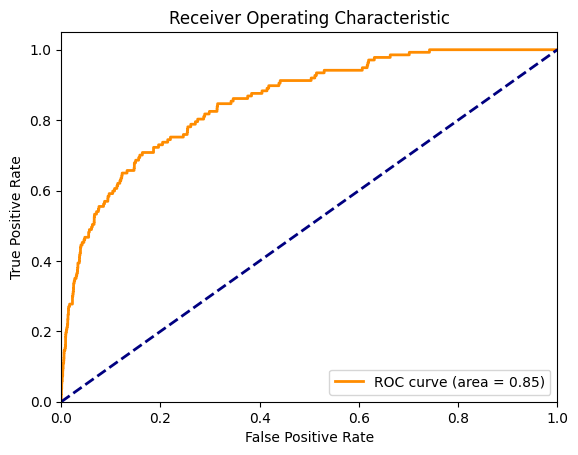

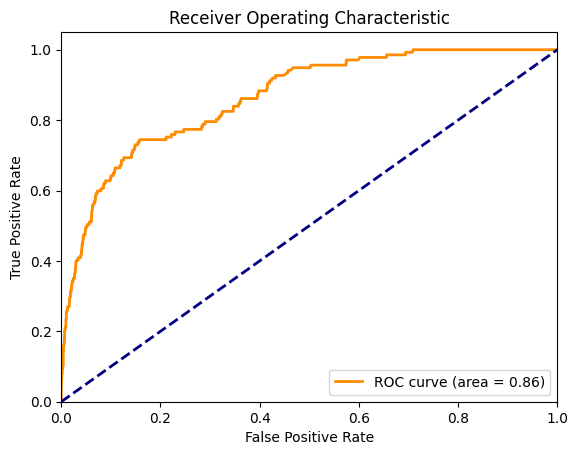

In [32]:
# Plot the ROC curve

#Cat Boost
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_cat)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#LGB
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_lgb)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Submission

In [72]:
def testing_hidden_data(hidden_data: pd.DataFrame) -> list:
    '''DO NOT REMOVE THIS FUNCTION.

The function accepts a dataframe as input and return an iterable (list)
of binary classes as output.

The function should be coded to test on hidden data
and should include any preprocessing functions needed for your model to perform. 
    
All relevant code MUST be included in this function.'''
    df = df_copy.copy()
    hidden_data['f_purchase_lh'] = 0
    df_len = len(df)

    df = clean(pd.concat([df, hidden_data])).copy()
    hidden_data = df.iloc[df_len:, :].drop(columns=['f_purchase_lh'])
    
    y_val_pred_lgb = bst.predict(hidden_data, num_iteration=bst.best_iteration)
    y_val_pred_cat = cat_model.predict_proba(hidden_data)[:, 1]
    y_val_pred = (y_val_pred_cat > multiplier_best * cat_thres_best).astype(int) | (y_val_pred_lgb > multiplier_best * lgb_thres_best).astype(int)
    return y_val_pred.tolist()

In [73]:
test_df = pd.read_parquet(filepath)
# test_df = df_copy.copy()
test_df = test_df.drop(columns=["f_purchase_lh"])
print(testing_hidden_data(test_df))

# Some Explanations

### Feature selection:
Some columns have correlation 1 with each other. By dropping columns when this happens, we can reduce the runtime of models without losing information.




### Data cleaning
Some columns have NaN values. We fill the NaN values with what we believe to make the most sense for each column. 

Some columns may measure the time since some event happened. If those columns are NaN, we take it to mean that that event has not yet happened for that customer. Therefore, we think it makes sense to fill NaN values with a high value, like the maximum value of that column. Doing this gave slightly better predictions than if we filled the NaN values with the median of that column, which confirms our intuition.

For other columns, we used KNNImputer to impute values based on their 5 nearest neighbours. We think this makes more sense than doing something simpler like taking the median value, because information from other columns may be able to predict the missing values.

We also noticed that hh_size_est is just hh_size rounded, which means they're nearly co-linear. We decided to remove hh_size_est because it doesn't really contribute any new information.

### Feature Engineering

annual_income_est - We encoded this categorical data into a numerical format. The numbers we assigned matches the inherent ordering implied, ranging from 'BELOW30K' mapping to 1, to 'ABOVE200K' mapping to 5.

### Handling Highly Imbalanced Samples
Since the minority class (where f_purchase_lh = 1) only makes up a small proportion of the data, we used SMOTE to over-sample the minority class. This improved the performance of our model.


### Insights derived from analysis
Plotting a histogram of f_purchase_lh against tot_inforce_pols results in an increasing trend. This suggests that if a customer had more in-force policies, they were more likely to purchase life or health insurance products within the next three months.

### Choice of model
From trying the different models suggested in the given notebook, we found that the gradient boosting performed best among all the models given. We decided to use a combination of CatBoost and LightGBM, which are popular frameworks for gradient boosting.

LightGBM is known for its high speed and lower memory usage compared to other gradient boosting frameworks. This is largely due to its histogram-based algorithms that can run quickly.

CatBoost is designed to reduce overfitting and includes several algorithmic advancements like ordered boosting, which can improve accuracy.

We found that combining the results from these two models gave improved performance over using just a single model.

### Performance of model
Akaike Information Criterion (AIC) and adjusted R^2 value are not very suitable metrics for this binary classification task. We decided to use metrics like F1 score and ROC-AUC, which are more relevant for this task.